This notebook is used to perform some analysis on our datasets.

# Importation

In [28]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [19]:
#TODO change here the path to your data folder
data_path='./data'

In [20]:
with open(data_path+"/dict_genres.json", "r") as rfile: 
    dict_genres=json.load(rfile) #will be useful to remap genres names to the ids later
    
with open(data_path+"/genres_counts.json", "r") as rfile: 
    genres_count=json.load(rfile) #will be useful to analyze the data

In [21]:
books_df=pd.read_csv(data_path+'/books_clean.csv')

In [22]:
chapters_df=pd.read_csv(data_path+'/chapters_clean.csv')

# Genres database

In [33]:
books_df.head()

,title,text,genres,idx_genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Di...","{'21st-century', 'history', 'roman', 'classics...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...","[16, 17, 3, 18, 19, 5, 8, 7, 20, 21, 22, 23, 2..."
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '...","[26, 1, 27, 28, 29, 30, 11, 14, 31, 32, 33, 19..."
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad...","{'20th-century', 'science-fiction', 'speculati...","[21, 18, 23]"
4,la fiammetta,"Produced by Ted Garvin, Dave Morgan and PG Dis...","{'literary-fiction', 'history', 'feminism', 'c...","[26, 1, 37, 3, 6, 7, 8, 21, 35, 11, 12, 13, 31]"


In [44]:
print(f'The database has {books_df.shape[0]} books.')
print(f'The average length of a book is {round(np.mean(books_df.text.str.len()))} characters.')
print(f'The average number of genres per book is {round(np.mean(books_df.genres.apply(lambda x: len(x.split(",")))))}.')

The database has 1001 books.
The average length of a book is 363675 characters.
The average number of genres per book is 7


In [53]:
#top genres
counts_df=pd.DataFrame.from_dict(genres_count, orient='index')
counts_df.sort_values(0, ascending=False).head(10)

,0
'fiction',6527
'classics',4827
'20th-century',2797
'non-fiction',2760
'history',2626
'literature',2469
'historical-fiction',2344
'novels',2021
'historical',1984
'romance',1824


Text(0, 0.5, 'Books count')

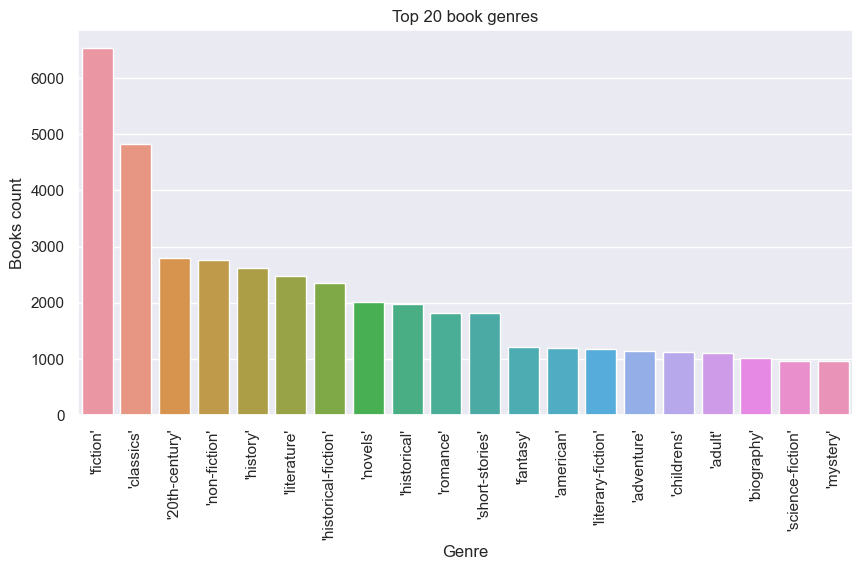

In [57]:
fig,ax=plt.subplots(figsize=(10,5))
top20=counts_df.sort_values(0, ascending=False).head(20)
sns.barplot(top20.T)
ax.set_xticklabels(top20.index, rotation=90)
ax.set_title('Top 20 book genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Books count')

# Chapters database

In [60]:
print(f'The database has {chapters_df.shape[0]} chapters.')
print(f'The database has {chapters_df.title.nunique()} books.')
print(f'The average number of chapters per book is {round(chapters_df.shape[0]/chapters_df.title.nunique())}.')
print(f'The average length of a chapter is {round(np.mean(chapters_df.chap_text.str.len()))} characters.')

The database has 10000 chapters.
The database has 4182 books.
The average number of chapters per book is 2.
The average length of a chapter is 16352 characters.


In [64]:
#top books
counts_chap=chapters_df.groupby('title').agg(pd.Series.nunique)
counts_chap.sort_values('chap_text', ascending=False).head(20)

,chap_text
title,
works of robert burns,75
the poetical works of thomas hood,73
the aeneid of virgil,45
historical novels,37
plutarchs lives volume iii,30
childe harolds pilgrimage,30
websters unabridged dictionary,25
war and peace,23
the new testament,22
